# Twitch Learning
## Analyzing Chat Logs
___
2018 | Bernard Kung
___

This is my development notebook for analyzing Twitch logs. 

## Goals

1. Convert timestamps columns (month, day, time) to proper timestamp format column
2. Basic Analysis
    - message count per second
    - average message count per second
    - outlier detection
    - highlight moment detection
3. Tokenize messages
3. Basic NLP Analysis
    - words per message
    - most frequent words per second
    - most common message (copy-pasta)
    - chat sentiment

In [5]:
import os
import glob

In [6]:
import numpy as np
import pandas as pd

In [7]:
import seaborn as sns
%matplotlib inline

In [8]:
import nltk
from nltk.book import *
# nltk.download('punkt')

### Convert to timestamps. 
Most of the columns were read in as objects.

Probably should re-consider how I process the chat logs.

In [9]:
log = pd.read_json(r'..\Data\overwatchleague_2018_02_24.txt', orient='split')

In [10]:
log["timestamp"] = pd.to_datetime(log.month + " " + log.day.astype(str) + ", " + "2018"+ 
                                  " " + log.time.astype(str))

### Basic Analysis

message count per second

Weird things: so the group_by creates a group_by object. Now initially I'm creating a new data frame to store aggregated data. However I want to rename the column, but I'm not sure how to concisely create a new data frame from a group_by and rename it immediately. Morever, using reset index now is problematic because i add other group_by results onto the dataframe later. So i need to either reset index on those, which may not line up, or just do this.

In [12]:
log_agg = log[["timestamp", "message"]].groupby("timestamp").count()
log_agg.head()

,message
timestamp,
2018-02-24 00:41:45,7
2018-02-24 00:41:46,6
2018-02-24 00:41:47,8
2018-02-24 00:41:48,9
2018-02-24 00:41:49,3


In [13]:
#log_agg = log_agg.reset_index()

### Tokenization

tokenize messages, create a token count

In [14]:
log['token'] = log.apply(lambda row: nltk.word_tokenize(row['message']), axis = 1)

In [15]:
log['token_count'] = log['token'].apply(lambda x: len(x))

In [16]:
log_agg["avg_token_count"] = log[["timestamp", "token_count"]].groupby("timestamp").mean()
log_agg.head()

,message,avg_token_count
timestamp,,
2018-02-24 00:41:45,7,2.142857
2018-02-24 00:41:46,6,2.166667
2018-02-24 00:41:47,8,4.875000
2018-02-24 00:41:48,9,3.555556
2018-02-24 00:41:49,3,2.333333


In [17]:
log_agg = log_agg.reset_index()
log_agg = log_agg.rename(columns = {'message':'num_message'})
log_agg.head()

,timestamp,num_message,avg_token_count
0,2018-02-24 00:41:45,7,2.142857
1,2018-02-24 00:41:46,6,2.166667
2,2018-02-24 00:41:47,8,4.875000
3,2018-02-24 00:41:48,9,3.555556
4,2018-02-24 00:41:49,3,2.333333


#### Basic Distribution Plots
message count per second
token count per message per second

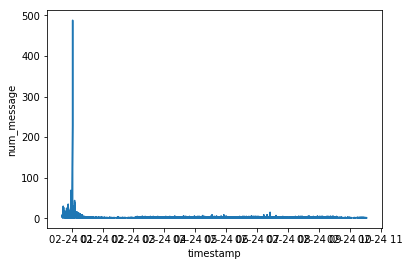

In [18]:
sns.lineplot(data=log_agg, x='timestamp', y='num_message')

There's a weird outlier here

In [19]:
log_agg[log_agg['num_message']>400]['timestamp']

1088   2018-02-24 01:01:51
Name: timestamp, dtype: datetime64[ns]

In [20]:
log[log['timestamp']=='2018-02-24 01:01:51']

,month,day,time,username,message,timestamp,token,token_count
7757,Feb,24,01:01:51,its_tenzin,MY BOY FLETA,2018-02-24 01:01:51,"[MY, BOY, FLETA]",3
7758,Feb,24,01:01:51,legos__,"""yeah that was cool""",2018-02-24 01:01:51,"[``, yeah, that, was, cool, '']",6
7759,Feb,24,01:01:51,nathandplays,PogChamp,2018-02-24 01:01:51,[PogChamp],1
7760,Feb,24,01:01:51,willowport,PogChamp,2018-02-24 01:01:51,[PogChamp],1
7761,Feb,24,01:01:51,nserror,LUL,2018-02-24 01:01:51,[LUL],1
7762,Feb,24,01:01:51,ow_z0mby,PogChamp,2018-02-24 01:01:51,[PogChamp],1
7763,Feb,24,01:01:51,teenageriot_,PunchTrees,2018-02-24 01:01:51,[PunchTrees],1
7764,Feb,24,01:01:51,1c3m4nz,OWLSEO OWLSEO OWLSEO OWLSEO,2018-02-24 01:01:51,"[OWLSEO, OWLSEO, OWLSEO, OWLSEO]",4
7765,Feb,24,01:01:51,saberhagensan,DAMNNNNNNNNNNNNNNNN,2018-02-24 01:01:51,[DAMNNNNNNNNNNNNNNNN],1
7766,Feb,24,01:01:51,thequiveringdancer,troll,2018-02-24 01:01:51,[troll],1


At this point, I have a basic tokenization of messages by word, and some basic exploratory analysis in terms of number of messages, average messages, length of message, etc. 

Group all the messages into a single corpus, as well as smaller by second corpuses. NLP seems to focus more on larger corpuses (corpi?). 

In [23]:
log.head()

,month,day,time,username,message,timestamp,token,token_count
0,Feb,24,00:41:45,zinicr,yo,2018-02-24 00:41:45,[yo],1
1,Feb,24,00:41:45,sugoi_bokchoy,OWLLDN,2018-02-24 00:41:45,[OWLLDN],1
2,Feb,24,00:41:45,acenightfall,Fleta god,2018-02-24 00:41:45,"[Fleta, god]",2
3,Feb,24,00:41:45,ani127,OWLAna OWLMercy OWLSombra OWLTorbjorn OWLReape...,2018-02-24 00:41:45,"[OWLAna, OWLMercy, OWLSombra, OWLTorbjorn, OWL...",6
4,Feb,24,00:41:45,sugulite,PogChamp,2018-02-24 00:41:45,[PogChamp],1


In [41]:
message = log['message'].str.cat(sep=' ')
message_tokens = nltk.word_tokenize(message)

In [47]:
message_tokens.count("PogChamp")

382

In [45]:
len(message_tokens)

165013

In [48]:
message_tokens.index('Kappa')

2291

In [49]:
message_tokens[2291]

'Kappa'

In [43]:
def lexical_diversity(text):
    return len(set(text)) / len(text) 

def percentage(count, total):
     return 100 * count / total

In [44]:
lexical_diversity(message_tokens)

0.09008987170707762

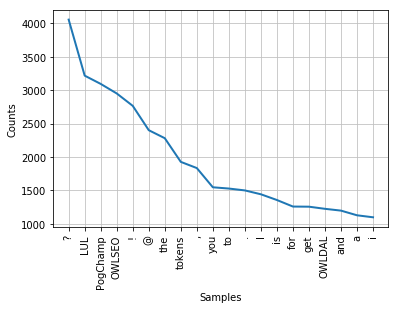

In [54]:
message_freq = nltk.FreqDist(message_tokens)
message_freq.plot(20, cumulative=False)

In [21]:
emotes = pd.read_json('https://twitchemotes.com/api_cache/v3/global.json').transpose()

In [22]:
emotes.head()

,code,emoticon_set,id
JKanStyle,JKanStyle,0,15
OptimizePrime,OptimizePrime,0,16
StoneLightning,StoneLightning,0,17
TheRinger,TheRinger,0,18
RedCoat,RedCoat,0,22
